<a href="https://colab.research.google.com/github/andrewshandy/Molecular_Properties_Prediction/blob/main/models%5Cbaseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()

In [ ]:
!mamba install -c conda-forge rdkit chembl_structure_pipeline


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.8.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit', 'chembl_structure_pipeline']

conda-forge/linux-64     Using cache
conda-forge/noarch     

In [ ]:
!pip install git+https://github.com/bp-kelley/descriptastorus

  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-0rfvzyjy
  Running command git clone -q https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-0rfvzyjy
     |████████████████████████████████| 759 kB 8.4 MB/s 
  Created wheel for descriptastorus: filename=descriptastorus-2.3.0.2-py3-none-any.whl size=60174 sha256=f8c6d01ee82b2310a58112a6c43dd19ccbea9cf8d983ab3d883275bd39a387ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-igkjn690/wheels/f9/c3/4f/e7d01f4f2f1a89aef8f0ef088beb4a94976324f3ee21410b10
Successfully built descriptastorus


# Importing libraries

In [ ]:
!pip install loguru

In [ ]:
import pandas as pd
import os

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from tqdm import tqdm
from loguru import logger

from sklearn.model_selection import train_test_split

from typing import Dict, List, Optional
from pathlib import Path

from multiprocessing.pool import Pool

from rdkit.Chem.MolStandardize.tautomer import TautomerCanonicalizer

from multiprocessing.pool import Pool
from tqdm import tqdm




# Data Loading


In [ ]:
!wget https://www.dropbox.com/s/5b05tivi01a43np/delaney-processed.csv

--2021-05-06 07:08:41--  https://www.dropbox.com/s/5b05tivi01a43np/delaney-processed.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5b05tivi01a43np/delaney-processed.csv [following]
--2021-05-06 07:08:41--  https://www.dropbox.com/s/raw/5b05tivi01a43np/delaney-processed.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3b8d6942707fe1f4a37cdae7ca.dl.dropboxusercontent.com/cd/0/inline/BN_hA1tuACkjPt45hZRIIjnVrNMab4heQCY8t7yL7Xm7vKW-5zYnvBMaI58pLD2-FQXbNGp1RJdUeoYJm4oB8uCl8V78SGlkyVdcbIh6dh84AYK0btGvp-pR1zgFVgvx1iVhoCuIIiqCoWRslOF-WSkE/file# [following]
--2021-05-06 07:08:41--  https://uc3b8d6942707fe1f4a37cdae7ca.dl.dropboxusercontent.com/cd/0/inline/BN_hA1tuACkjPt45hZRIIjnVrNMab4heQCY8t7yL7Xm7vKW-5zYnvBMaI58pLD2

In [ ]:
class DatasetsHolder:
    @staticmethod
    def read_datasets(inp_folder_path):
        df = pd.read_csv(inp_folder_path)
        return df
        # return pandas DataFrame


class StandardizeDatasets:
    @staticmethod
    def standardize_smiles(smi: str) -> Optional[str]:
        mol = Chem.MolFromSmiles(smi)
        mol = Chem.MolToSmiles(mol)
        return mol
        "crete typical standartization of one smiles"

    @logger.catch()
    def standartize(self, inp_path: Path, out_path: Path):
        df_reader = DatasetsHolder()
        df = df_reader.read_datasets(inp_path)
        with Pool(10) as pool:
            df['standardize_smiles'] = list(
                      tqdm(pool.imap(self.standardize_smiles, df.smiles), total=df.shape[0])
                  )
        df.to_csv(out_path, index=False)
        
        return df
        "apply standartization to all smiles"


class StandardizeTautomers(StandardizeDatasets):
    @staticmethod
    def standardize_smiles(smi: str) -> Optional[str]:
        Canonicalizer = TautomerCanonicalizer()
        mol = Chem.MolFromSmiles(smi)
        standorized = Canonicalizer.canonicalize(mol)
        
        return Chem.MolToSmiles(standorized)
      # "apply TautomerCanonicalizer() to standartization"

In [ ]:
st = StandardizeTautomers()
df = st.standartize('/content/delaney-processed.csv', 'standartized_df.csv')

100%|██████████| 1128/1128 [00:14<00:00, 79.54it/s]


In [ ]:
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,standardize_smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,Cc1occc1C(=O)Nc1ccccc1
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),CC(C)=CCCC(C)=CC=O
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C,CCC(C)C


In [ ]:
SMILES_COLUMN = "standardize_smiles"
VALUE_COLUMN = 'expt'

DATASET_INPUT_PATH = "/content/standartized_df.csv"

# Feature extracting

In [ ]:
data_reader = DatasetsHolder()
data = data_reader.read_datasets(DATASET_INPUT_PATH)
data
data.drop(columns=["Compound ID", "smiles", "standardize_smiles"])

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
0,-0.974,1,457.432,7,3,7,202.32,-0.770
1,-2.885,1,201.225,1,2,2,42.24,-3.300
2,-2.579,1,152.237,0,0,4,17.07,-2.060
3,-6.618,2,278.354,0,5,0,0.00,-7.870
4,-2.232,2,84.143,0,1,0,0.00,-1.330
...,...,...,...,...,...,...,...,...
1123,-2.608,1,197.381,0,0,0,0.00,-1.710
1124,-0.908,1,219.266,1,0,1,71.00,0.106
1125,-3.323,1,246.359,0,0,7,18.46,-3.091
1126,-2.245,1,72.151,0,0,1,0.00,-3.180


In [ ]:
!pip install https://github.com/bp-kelley/descriptastorus

     - 172 kB 6.2 MB/s
  ERROR: Cannot unpack file /tmp/pip-unpack-8c_2941l/descriptastorus (downloaded from /tmp/pip-req-build-az5ku29t, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-az5ku29t


In [ ]:
from descriptastorus.descriptors import rdDescriptors
from rdkit import Chem
import logging
from descriptastorus.descriptors import rdNormalizedDescriptors


generator = rdNormalizedDescriptors.RDKit2DNormalized()


def rdkit_2d_features(smiles: str):
    features = generator.process(smiles)
    if features[0] == False:
        print(f'{smiles} were not processed correctly')
        return None
    else:
        return features[1:]
    

In [ ]:
def create_feature_dataframe(df):
    feature_names = [x[0] for x in generator.columns]

    rdkit_feats = [ ]
    for i in range(len(df)):
        smiles = df.iloc[i][SMILES_COLUMN]
        target_value = df.iloc[i]['measured log solubility in mols per litre']
        features = generator.process(smiles)
        dictionary = dict(zip(feature_names, features[1:]))
        dictionary['target'] = target_value
        rdkit_feats.append(dictionary)

    return pd.DataFrame(rdkit_feats)
    


In [ ]:
new_data = create_feature_dataframe(data)

In [ ]:
new_data

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,...,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed,target
0,0.431154,0.304703,0.742380,0.611255,0.564015,0.695016,0.628013,0.550359,0.632004,0.526516,0.647978,0.533322,0.567960,0.441039,9.662156e-01,9.852195e-01,6.893569e-07,0.100218,0.131846,2.509948e-11,9.258417e-11,8.288383e-01,0.464812,2.391450e-11,8.205149e-01,0.722986,0.070685,0.057481,0.064305,9.048759e-01,0.837960,0.706530,0.720712,0.999999,0.815583,0.810059,0.640453,0.664681,0.063911,0.247244,...,0.165451,1.171103e-13,0.0,0.164669,0.166925,0.0,5.100713e-08,7.105427e-15,0.154654,2.794209e-22,0.975564,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.069877,-0.770
1,0.831056,0.076056,0.026948,0.030340,0.020389,0.033934,0.032592,0.020369,0.029170,0.015533,0.038519,0.021520,0.041210,0.024028,4.074888e-10,2.648697e-01,6.893569e-07,0.218593,0.307374,1.510129e-01,6.498039e-01,5.663300e-01,0.651997,1.691932e-01,3.299699e-01,0.018750,0.715690,0.681483,0.524134,1.024882e-01,0.761894,0.030800,0.019873,0.999999,0.018461,0.031261,0.270675,0.024863,0.170656,0.621108,...,0.165451,1.171103e-13,0.0,0.164669,0.166925,0.0,5.100713e-08,7.105427e-15,0.154654,2.794209e-22,0.000000,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.999908,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.861151,-3.300
2,0.991404,0.006351,0.008175,0.017477,0.011397,0.005603,0.013714,0.008724,0.020863,0.010806,0.009586,0.005097,0.008525,0.004764,4.074888e-10,2.648697e-01,6.893569e-07,0.100218,0.019674,5.917485e-01,6.288924e-01,3.815791e-01,0.477870,5.834501e-01,7.522456e-13,0.003645,0.829479,0.638385,0.295614,7.336696e-01,0.954836,0.005699,0.002908,0.999999,0.026889,0.179088,0.789732,0.006155,0.057285,0.101979,...,0.165451,1.171103e-13,0.0,0.164669,0.166925,0.0,5.100713e-08,7.105427e-15,0.154654,2.794209e-22,0.000000,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.171383,-2.060
3,0.777909,0.624374,0.145605,0.194124,0.153062,0.246362,0.287320,0.218869,0.320262,0.224962,0.476379,0.357717,0.590347,0.464119,4.074888e-10,2.175235e-08,6.893569e-07,0.100218,0.019674,2.509948e-11,9.658268e-01,5.856109e-17,0.000001,9.913422e-01,7.522456e-13,0.116563,0.000944,0.002053,0.003521,2.155533e-14,0.458839,0.214325,0.122267,0.999999,0.062004,0.044811,0.197879,0.191387,0.010197,0.022049,...,0.165451,1.171103e-13,0.0,0.164669,0.166925,0.0,5.100713e-08,7.105427e-15,0.154654,2.794209e-22,0.000000,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061

# Train test split




In [ ]:
train_data, test_data = train_test_split(new_data, test_size=0.3)# поделите данные методом train_test_split

In [ ]:
 # удалите ненужные столбцы
 train_data.head()

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,...,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed,target
388,0.965074,0.001021,0.000689,0.001943,0.001227,0.000534,0.003735,0.002783,0.002927,0.001293,0.003640,0.001936,0.002950,0.001634,4.074888e-10,2.175235e-08,6.893569e-07,0.224001,0.019674,4.810067e-01,9.258417e-11,5.856109e-17,0.477870,0.221443,3.705617e-01,0.000351,0.952612,0.787999,0.126654,9.993903e-01,0.987224,0.000481,0.000238,0.999999,0.002627,0.036242,0.485499,0.000556,0.036704,0.246120,...,0.165451,1.171103e-13,0.0,0.164669,0.166925,0.0,5.100713e-08,7.105427e-15,0.154654,2.794209e-22,0.0,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.463577,-0.800
119,0.933955,0.048591,0.010670,0.012136,0.014014,0.017069,0.018920,0.017923,0.017403,0.016513,0.028304,0.027961,0.038704,0.038734,4.074888e-10,2.175235e-08,6.893569e-07,0.100218,0.019674,4.112709e-01,9.258417e-11,5.856109e-17,0.699809,0.382866,6.506469e-01,0.012672,0.025137,0.041139,0.072556,2.155533e-14,0.915227,0.014189,0.014336,0.999999,0.008225,0.019387,0.225799,0.017862,0.018283,0.024804,...,0.165451,1.171103e-13,0.0,0.164669,0.166925,0.0,5.100713e-08,7.105427e-15,0.154654,2.794209e-22,0.0,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.562299,-4.540
18,0.974471,0.075477,0.142984,0.191305,0.279407,0.095154,0.134122,0.392632,0.094890,0.452232,0.039107,0.338030,0.045773,0.405363,6.383468e-01,2.175235e-08,6.893569e-07,0.218885,0.543430,3.002280e-01,9.258417e-11,3.812574e-01,0.670379,0.317819,8.998040e-01,0.183775,0.734615,0.422045,0.202284,9.175590e-01,0.971565,0.106302,0.173361,0.999999,0.314502,0.378890,0.630160,0.135397,0.017037,0.281963,...,0.165451,1.171103e-13,0.0,0.164669,0.166925,0.0,5.100713e-08,7.105427e-15,0.154654,2.794209e-22,0.0,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.703421,-3.640
383,0.986029,0.057385,0.055636,0.095220,0.069832,0.040070,0.060787,0.038984,0.073839,0.042724,0.014528,0.007795,0.023673,0.013543,4.074888e-10,2.175235e-08,6.893569e-07,0.429137,0.491213,2.509948e-11,9.258417e-11,4.146541e-01,0.639643,0.682760,3.491108e-01,0.036087,0.423058,0.270446,0.150806,9.393189e-01,0.866128,0.043509,0.031458,0.999999,0.085339,0.132241,0.494658,0.038015,0.015240,0.614377,...,0.165451,1.171103e-13,0.0,0.164669,0.166925,0.0,5.100713e-08,7.105427e-15,0.999225,2.794209e-22,0.0,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-1

# XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']


In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

[07:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_squared_error as mse


y_pred = model.predict(X_test)
loss = mse(y_pred, y_test, squared=False)
loss

0.7005789582849868

# Train and Validation

![alt text](https://drive.google.com/uc?id=1Ilkmp248M0kKA3wFJQNQcNEY9OFsVoWz)


<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=14fZpuBDsTMqv1XtLJvcKMNNa1vlr_ZG6" 
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>




In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# создайте делитель для кросс-валидации
losses = []
kf = KFold(n_splits=5)
X_train_init = X_train.to_numpy()
y_train_init = y_train.to_numpy()
for train_index, test_index in kf.split(train_data):
    X_train, X_test = X_train_init[train_index], X_train_init[test_index]
    y_train, y_test = y_train_init[train_index], y_train_init[test_index]
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    loss = mse(y_pred, y_test, squared=False)
    losses.append(loss)

[07:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
np.std(losses)

0.038275458289564294

# Baseline rmse result

In [ ]:
np.mean(losses)

0.6238616057247394

In [ ]:
losses

[0.6130729786531145,
 0.5942710441676102,
 0.6569147807560923,
 0.5764672422829149,
 0.6785819827639652]

# Grid search



<a href="https://drive.google.com/uc?id=1Goc0VR5I--q9rYj-vYlmddanKP3-3sLJ
" target="_blank"><img src="https://drive.google.com/uc?id=1Goc0VR5I--q9rYj-vYlmddanKP3-3sLJ" 
alt="IMAGE ALT TEXT HERE" width="480" border="0" /></a>


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
def hyperparamters_search(max_depth, n_estimators, points, target):
  # инициализируем модель и способ валидации k-fold
    losses = []
    kf = KFold(n_splits=3)
    
    # X_train_0 = X_train.to_numpy()
    # y_train_0 = y_train.to_numpy()
    
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    
    for train_index, test_index in kf.split(train_data):
        X_train, X_test = X_train_init[train_index], X_train_init[test_index]
        y_train, y_test = y_train_init[train_index], y_train_init[test_index]
        
        model = XGBRegressor()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        loss = mse(y_pred, y_test, squared=False)
        losses.append(loss)
        
        # считаем метрики в процессе кросс-валидации
        mae_scores.append(mean_absolute_error(y_pred, y_test))
        rmse_scores = mse(y_pred, y_test, squared=False)
        r2_scores = r2_score(y_pred, y_test)

    # считаем среднее по полученным результатам
    mae = np.mean(mae_scores)
    rmse = np.mean(rmse_scores)
    r2 = np.mean(r2_scores)

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:3.2f} for xgboost model".format(mae, rmse, r2))

In [ ]:
n_estomators = [2, 10, 100]
for estimator in n_estomators:
    hyperparamters_search(20, estimator, " ", " ")

[07:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:    0.48, RMSE:    0.62, R2: 0.90 for xgboost model
[07:10:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:    0.48, RMSE:    0.62, R2: 0.90 for xgboost model
[07:10:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

logistic = XGBRegressor()

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [20, 40, 60, 80, 100, 200],
    'max_depth' : [12, 30, 50, 100],
    'num_leaves': np.arange(4, 100, 6), # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }


clf = RandomizedSearchCV(logistic, gridParams, random_state=42, scoring='neg_root_mean_squared_error')
search = clf.fit(new_data.drop(columns=['target']), new_data['target'])
search.best_params_

[07:10:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'boosting_type': 'dart',
 'colsample_bytree': 0.65,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 100,
 'n_estimators': 200,
 'num_leaves': 70,
 'random_state': 500,
 'reg_alpha': 1.2,
 'reg_lambda': 1,
 'subsample': 0.7}

In [ ]:
model = XGBRegressor(**search.best_params_)
cross_val_score(model, new_data.drop(columns=['target']), new_data['target'])

[07:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.8086965 , 0.78880374, 0.77875858, 0.80013824, 0.80946195])

# Got worse results than with basic parameters

In [ ]:
df_2 = new_data.join(data.drop(columns=["Compound ID", "smiles", "standardize_smiles"]))
df_2

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,...,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed,target,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
0,0.431154,0.304703,0.742380,0.611255,0.564015,0.695016,0.628013,0.550359,0.632004,0.526516,0.647978,0.533322,0.567960,0.441039,9.662156e-01,9.852195e-01,6.893569e-07,0.100218,0.131846,2.509948e-11,9.258417e-11,8.288383e-01,0.464812,2.391450e-11,8.205149e-01,0.722986,0.070685,0.057481,0.064305,9.048759e-01,0.837960,0.706530,0.720712,0.999999,0.815583,0.810059,0.640453,0.664681,0.063911,0.247244,...,0.154654,2.794209e-22,0.975564,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.069877,-0.770,-0.974,1,457.432,7,3,7,202.32,-0.770
1,0.831056,0.076056,0.026948,0.030340,0.020389,0.033934,0.032592,0.020369,0.029170,0.015533,0.038519,0.021520,0.041210,0.024028,4.074888e-10,2.648697e-01,6.893569e-07,0.218593,0.307374,1.510129e-01,6.498039e-01,5.663300e-01,0.651997,1.691932e-01,3.299699e-01,0.018750,0.715690,0.681483,0.524134,1.024882e-01,0.761894,0.030800,0.019873,0.999999,0.018461,0.031261,0.270675,0.024863,0.170656,0.621108,...,0.154654,2.794209e-22,0.000000,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.999908,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.861151,-3.300,-2.885,1,201.225,1,2,2,42.24,-3.300
2,0.991404,0.006351,0.008175,0.017477,0.011397,0.005603,0.013714,0.008724,0.020863,0.010806,0.009586,0.005097,0.008525,0.004764,4.074888e-10,2.648697e-01,6.893569e-07,0.100218,0.019674,5.917485e-01,6.288924e-01,3.815791e-01,0.477870,5.834501e-01,7.522456e-13,0.003645,0.829479,0.638385,0.295614,7.336696e-01,0.954836,0.005699,0.002908,0.999999,0.026889,0.179088,0.789732,0.006155,0.057285,0.101979,...,0.154654,2.794209e-22,0.000000,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.171383,-2.060,-2.579,1,152.237,0,0,4,17.07,-2.060
3,0.777909,0.624374,0.145605,0.194124,0.153062,0.246362,0.287320,0.218869,0.320262,0.224962,0.476379,0.357717,0.590347,0.464119,4.074888e-10,2.175235e-08,6.893569e-07,0.100218,0.019674,2.509948e-11,9.658268e-01,5.856109e-17,0.000001,9.913422e-01,7.522456e-13,0.116563,0.000944,0.002053,0.003521,2.155533e-14,0.458839,0.214325,0.122267,0.999999,0.062004,0.044811,0.197879,0.191387,0.010197,0.022049,...,0.154654,2.794209e-22,0.000000,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.7

In [ ]:
X_train, X_test = train_test_split(df_2, test_size=0.3) 

In [ ]:
X_train

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,...,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed,target,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
318,0.978951,0.050154,0.002254,0.001736,0.001099,0.004142,0.002680,0.002134,0.003098,0.001375,0.005926,0.003140,0.008857,0.004953,4.074888e-10,2.175235e-08,6.893569e-07,0.207408,0.302249,2.509948e-11,7.807846e-01,5.856109e-17,0.000001,5.837245e-01,3.876024e-01,0.001810,0.715690,0.787999,0.889342,2.155533e-14,0.854600,0.003383,0.002240,0.999999,0.000340,0.000335,0.063971,0.001809,0.023854,0.132646,...,0.154654,2.794209e-22,0.0,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.310870,-2.120,-1.255,1,135.130,2,2,0,80.48,-2.120
42,0.878761,0.015847,0.008610,0.006576,0.004150,0.009010,0.012270,0.007862,0.027732,0.014705,0.070551,0.040983,0.065956,0.039249,8.839381e-01,6.948099e-01,6.893569e-07,0.100218,0.355953,1.702062e-01,9.258417e-11,5.856109e-17,0.000001,3.381823e-01,7.522456e-13,0.006551,0.294906,0.107799,0.038419,8.278733e-01,0.899092,0.009170,0.007407,0.999999,0.003479,0.001058,0.086539,0.005999,0.113760,0.130408,...,0.154654,2.794209e-22,0.0,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,1.000000,0.329039,-1.655,-0.527,1,168.152,2,2,0,75.27,-1.655
79,0.723865,0.191194,0.205453,0.203132,0.276303,0.219469,0.232136,0.262872,0.231841,0.275857,0.243975,0.260633,0.310131,0.357068,5.940148e-01,2.175235e-08,6.893569e-07,0.224001,0.646964,4.622333e-01,6.516471e-01,7.438623e-01,0.464766,5.149472e-01,9.482937e-01,0.309315,0.943981,0.978253,0.971008,6.829037e-01,0.930034,0.214325,0.322766,0.999999,0.260342,0.265212,0.405263,0.274459,0.019464,0.147828,...,0.154654,2.794209e-22,0.0,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.156346,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.893211,-3.493,-4.603,1,342.226,0,3,5,49.17,-3.493
394,0.816009,0.136912,0.149141,0.197453,0.155986,0.131307,0.166974,0.118040,0.232807,0.154762,0.187888,0.119844,0.148372,0.092865,5.805847e-01,2.648697e-01,6.893569e-07,0.221987,0.019674,2.935831e-01,9.258417e-11,5.429037e-01,0.787662,1.691932e-01,7.522456e-13,0.095947,0.210213,0.083783,0.072556,2.940638e-01,0.678537,0.137062,0.087870,0.999999,0.159885,0.164971,0.411381,0.136986,0.324975,0.131697,...,0.154654,2.794209e-22,0.0,0.16764,6.314993e-25,0.168186,0.009089,0.168363,8.265423e-11,0.999908,0.0,0.0,0.021135,0.021135,2.388156e-20,0.0,8.336725e-25,0.000053,0.156951,4.034345e-08,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,1.000

In [ ]:
# создайте делитель для кросс-валидации
losses = []

kf = KFold(n_splits=5)

X_train_init = X_train.drop(columns=['target', 'measured log solubility in mols per litre']).to_numpy()
y_train_init = X_train['target'].to_numpy()

for train_index, test_index in kf.split(train_data):
    X_train, X_test = X_train_init[train_index], X_train_init[test_index]
    y_train, y_test = y_train_init[train_index], y_train_init[test_index]
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    loss = mse(y_pred, y_test, squared=False)
    losses.append(loss)

[07:11:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
losses

[0.7130377655176175,
 0.5985325780649248,
 0.574653030054312,
 0.6900495275256604,
 0.609435866947013]

In [ ]:
np.mean(losses)

0.6371417536219056

In [ ]:
np.std(losses)

0.054263362092416965

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

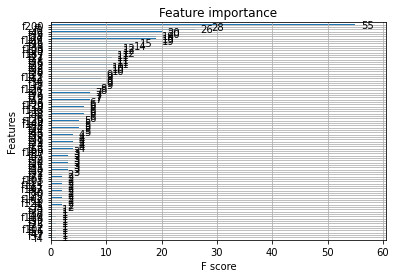

In [ ]:
plot_importance(model)

# After adding other features we got 0.63 rmse  


# Let's try to use LGBMRegressor


In [ ]:
from lightgbm import LGBMRegressor, plot_importance
lgbm = LGBMRegressor()

In [ ]:
# создайте делитель для кросс-валидации
losses = []
kf = KFold(n_splits=5)

# X_train_init = X_train.drop(columns=['target', 'measured log solubility in mols per litre']).to_numpy()
# y_train_init = X_train['target'].to_numpy()

for train_index, test_index in kf.split(train_data):
    X_train, X_test = X_train_init[train_index], X_train_init[test_index]
    y_train, y_test = y_train_init[train_index], y_train_init[test_index]
    
    model = LGBMRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    loss = mse(y_pred, y_test, squared=False)
    losses.append(loss)

In [ ]:
losses

[0.6796490524031943,
 0.5638396160825573,
 0.5850108617774448,
 0.699107308368015,
 0.6022784757467882]

In [ ]:
np.mean(losses)

0.6259770628755998

In [ ]:
np.std(losses)

0.05353434453489774

In [ ]:
X_train, X_test = train_test_split(df_2, test_size=0.3) 
X_train_init = X_train.drop(columns=['target', 'measured log solubility in mols per litre']).to_numpy()
y_train_init = X_train['target'].to_numpy()
X_test_init = X_test.drop(columns=['target', 'measured log solubility in mols per litre']).to_numpy()
y_test_init = X_test['target'].to_numpy()

model = LGBMRegressor()
model.fit(X_train_init, y_train_init)

y_pred = model.predict(X_test_init)
mse(y_pred, y_test_init, squared=False)

0.5963593960891262

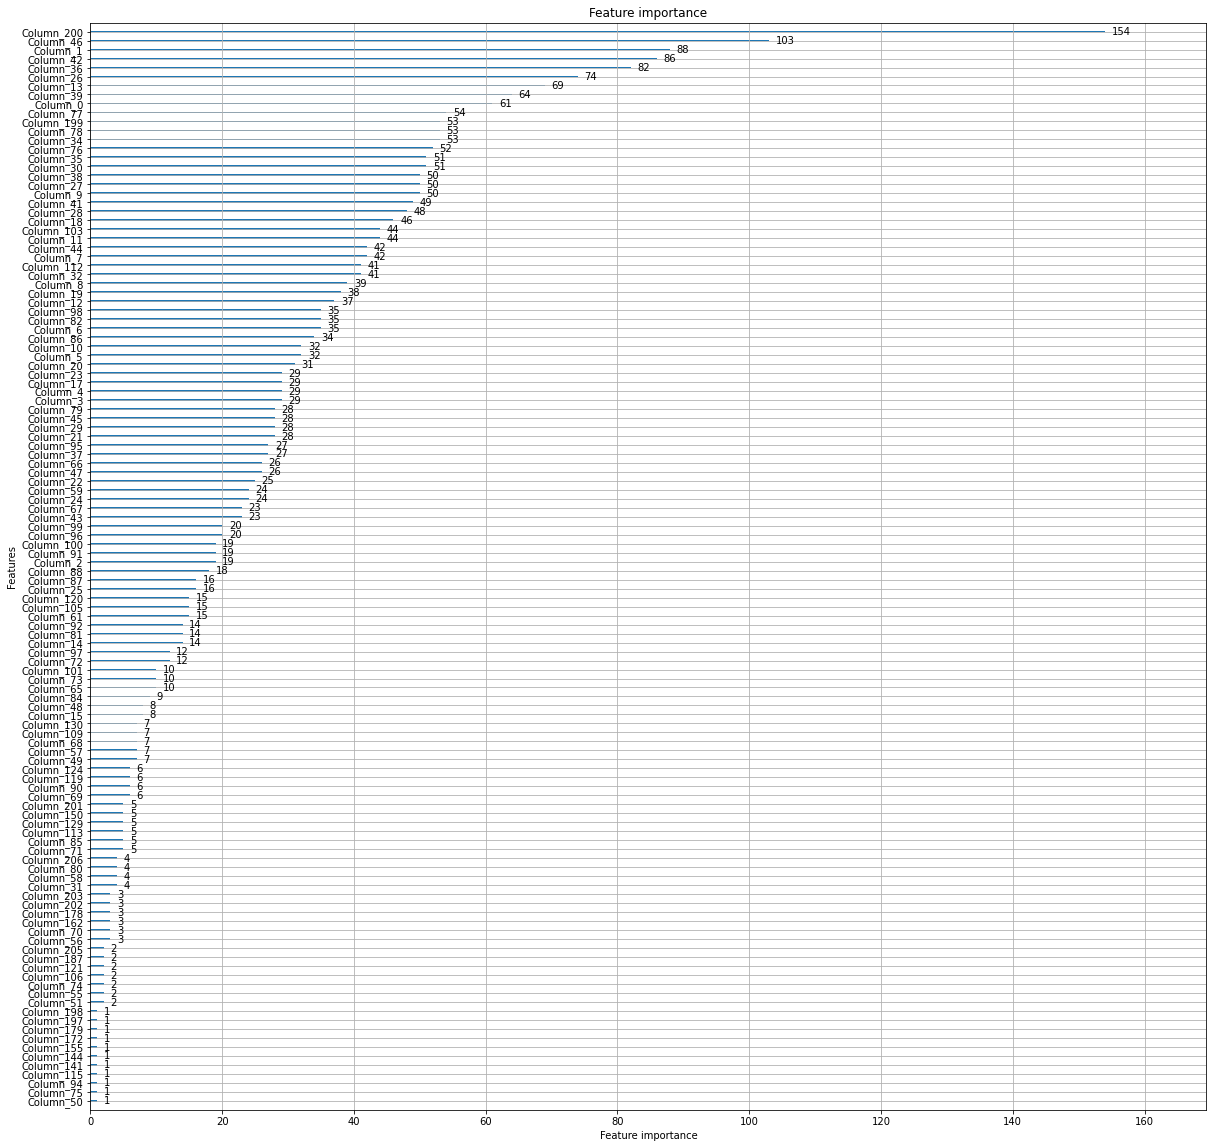

In [ ]:
plot_importance(model, figsize=(20, 20))

# With LGBM we got 0.59 rmse loss